In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0:'Setosa', 1:'Versicolor', 2:'Virginica'})

df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
92,5.8,2.6,4.0,1.2,1,Versicolor
48,5.3,3.7,1.5,0.2,0,Setosa
91,6.1,3.0,4.6,1.4,1,Versicolor
84,5.4,3.0,4.5,1.5,1,Versicolor
74,6.4,2.9,4.3,1.3,1,Versicolor


In [4]:
df['symbol'] = df['species'].map({
    'Setosa': '🌱',
    'Versicolor': '🌿',
    'Virginica': '🌺'
})

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,symbol
0,5.1,3.5,1.4,0.2,0,Setosa,🌱
1,4.9,3.0,1.4,0.2,0,Setosa,🌱
2,4.7,3.2,1.3,0.2,0,Setosa,🌱
3,4.6,3.1,1.5,0.2,0,Setosa,🌱
4,5.0,3.6,1.4,0.2,0,Setosa,🌱


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[iris.feature_names])

## PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## Explained variance
print("Explained variance: ", pca.explained_variance_ratio_)

Explained variance:  [0.72962445 0.22850762]


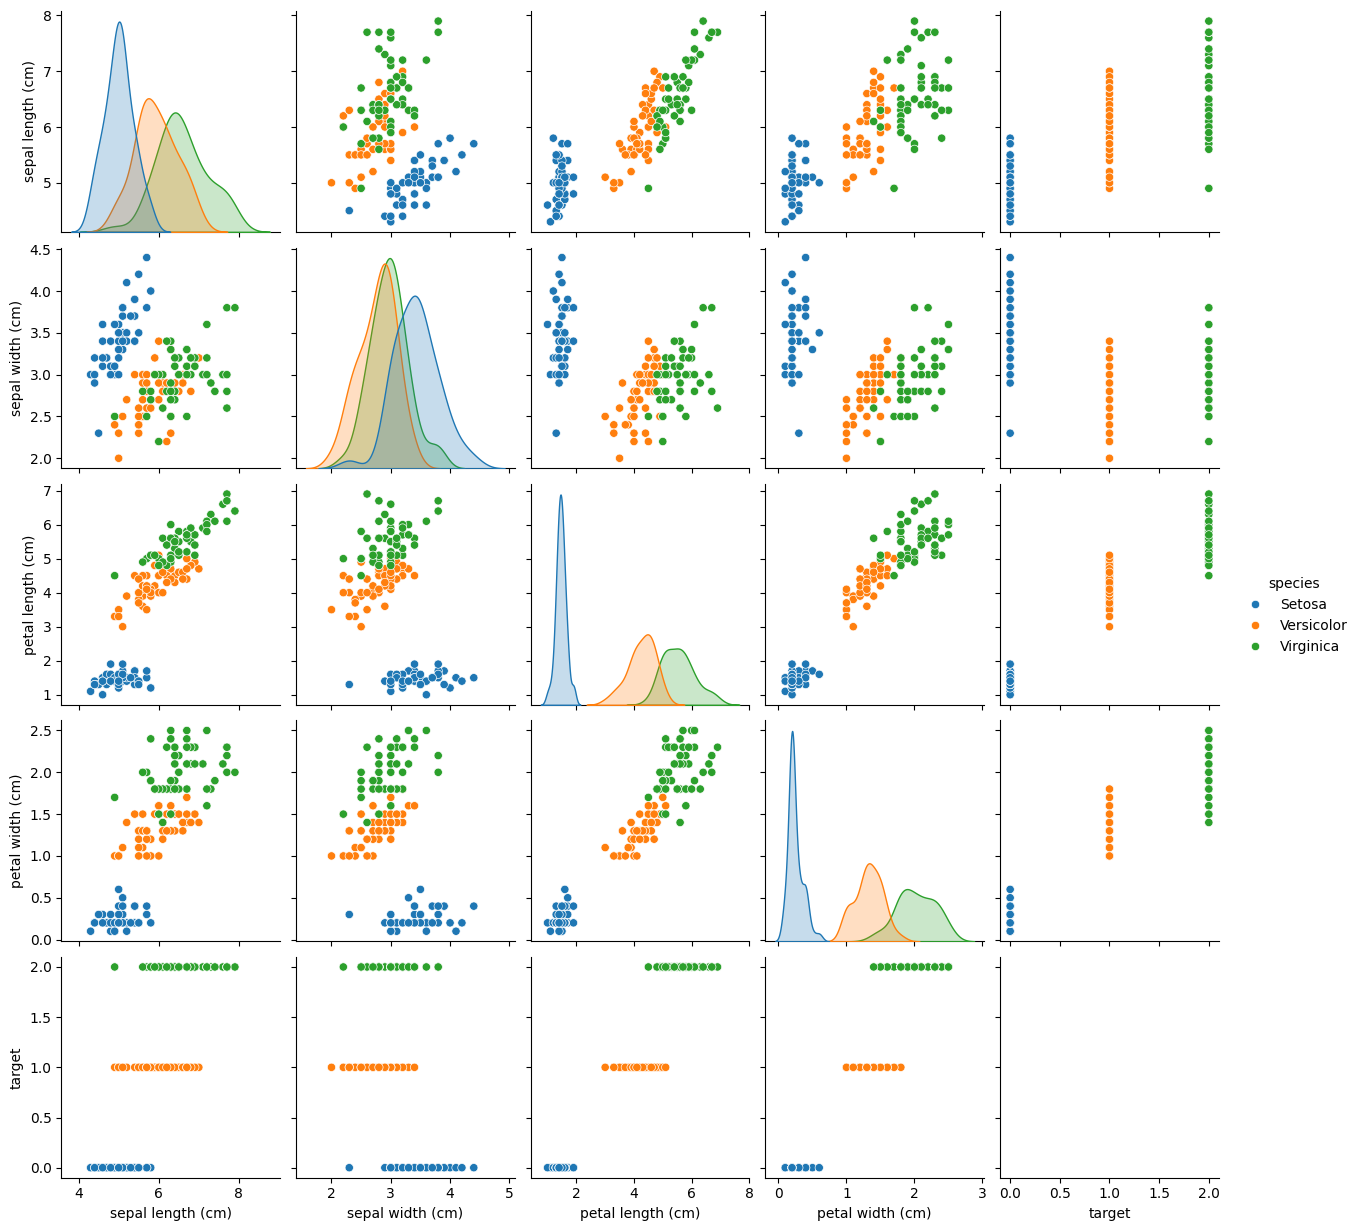

In [7]:
import seaborn as sns
sns.pairplot(df, hue='species')

<Axes: >

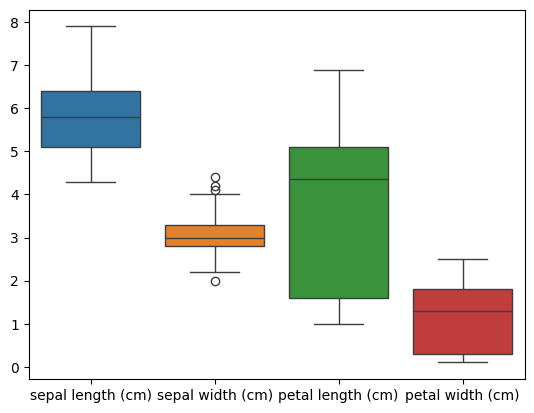

In [8]:
sns.boxplot(data=df[iris.feature_names])

<Axes: >

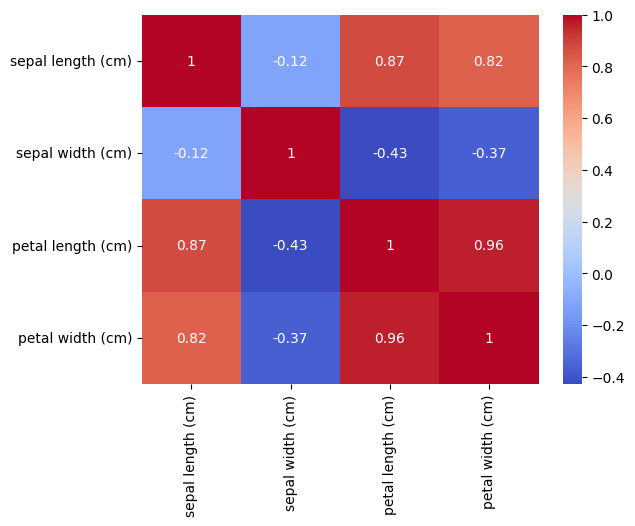

In [9]:
sns.heatmap(df[iris.feature_names].corr(), annot=True,cmap='coolwarm')

In [10]:
from sklearn.model_selection import train_test_split

X= df[iris.feature_names]
y= df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [11]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
symbol               0
dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# D Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

#SVM
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [13]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0
SVM Accuracy: 1.0
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



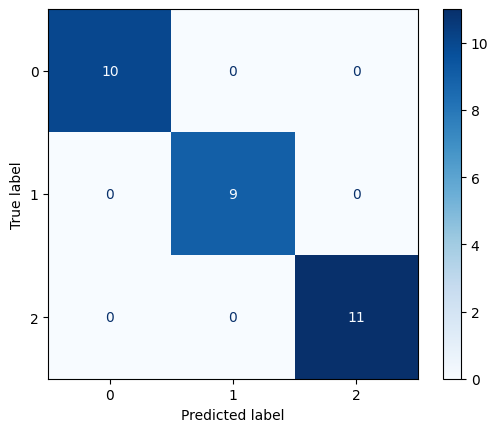

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm, X, y, cv = 5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validation scores: [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean accuracy: 0.9666666666666666


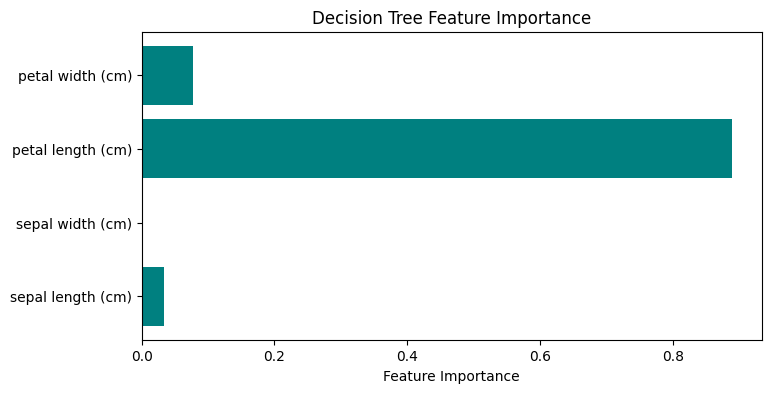

In [18]:
from matplotlib import pyplot as plt


importances = dt.feature_importances_
features = iris.feature_names

plt.figure(figsize=(8, 4))
plt.barh(features, importances, color='teal')
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize model
svm = SVC()

# Setup GridSearch
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# 🔧 Fit the grid search to training data
grid_search.fit(X_train, y_train)

# ✅ Now you can access the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validated Accuracy: 0.9583333333333334
